In [126]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe
genre = pd.read_csv('./input.csv')

# make sure you understand the type of the object
print(type(genre))

# check the top five and the botoom five data tuples
print(genre.head())
print(genre.tail())

<class 'pandas.core.frame.DataFrame'>
   Unnamed: 0  instance_id           artist_name            track_name  \
0           0      32894.0              Röyksopp  Röyksopp's Night Out   
1           1      46652.0  Thievery Corporation      The Shining Path   
2           2      30097.0        Dillon Francis             Hurricane   
3           3      62177.0              Dubloadz                 Nitro   
4           4      24907.0           What So Not      Divide & Conquer   

   popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652         -1.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  ... loudness   mode  speechiness               tempo  \
0           0.79200  ...   -5.201  Minor   

In [128]:
def convert(y):
    for i in range(len(y)):
        if y[i] == "Hip-Hop":
            y[i] = 0;
        else:
            y[i] = 1;

In [129]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(genre, test_size=0.2, random_state=25)

X = np.c_[genre.danceability]
y = np.c_[genre.music_genre]

print(y)
convert(y)

print(X)
print(y)

# split the data 70% for training, 30% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.20)

[['Electronic']
 ['Electronic']
 ['Electronic']
 ...
 ['Hip-Hop']
 ['Hip-Hop']
 ['Hip-Hop']]
[[0.652]
 [0.622]
 [0.62 ]
 ...
 [0.937]
 [0.829]
 [0.849]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [130]:
#logistic regression

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#rmse

# Create a simple linear regression model
model = LogisticRegression()
y=y.astype('int')

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X, y)

C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [132]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=10, random_state=None, shuffle=True)


In [133]:
logreg = LogisticRegression()

# Conduct 10-fold cross validation

rmse = []
r2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2.append(metrics.r2_score(y_test, y_pred))


print(rmse)
print(r2)

C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

[0.21630701377458625, 0.22934905294083743, 0.23808831662143337, 0.22033272936154305, 0.23252906795035425, 0.23439680131161406, 0.23439680131161406, 0.23001516633514854, 0.23064621050128842, 0.22490307990073682]
[-0.04908536585365808, -0.05552147239263805, -0.06009244992295848, -0.05102352581729308, -0.057160417947141884, -0.058135958166717794, -0.058135958166717794, -0.05586249232658069, -0.05618667485416018, -0.05327617881200264]


C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

[[0.47340448 0.48584422 0.47864453 0.48264419 0.47491939 0.47302347
  0.48442981 0.49239951 0.47827592 0.47264153]
 [0.47400135 0.47764202 0.47443404 0.48202739 0.4763666  0.48161487
  0.47890731 0.48182126 0.47974529 0.47572502]
 [0.47408799 0.47709059 0.47378457 0.47959896 0.4755964  0.4790123
  0.47812824 0.48047495 0.48032928 0.48163552]
 [0.47425112 0.47436755 0.47448388 0.4790688  0.47667822 0.47644866
  0.47782107 0.47985777 0.47782107 0.48019471]
 [0.47454202 0.47613967 0.4758589  0.48074771 0.47688597 0.47864453
  0.47846033 0.4790123  0.47983668 0.48102001]]
[[0.47890401 0.47890401 0.47827592 0.47827592 0.47827592 0.47893881
  0.47893881 0.47893881 0.47893881 0.47893881]
 [0.47890401 0.47890401 0.47827592 0.47827592 0.47827592 0.47893881
  0.47893881 0.47893881 0.47893881 0.47893881]
 [0.47890401 0.47890401 0.47827592 0.47827592 0.47827592 0.47893881
  0.47893881 0.47893881 0.47893881 0.47893881]
 [0.47890401 0.47890401 0.47827592 0.47827592 0.47827592 0.47893881
  0.47893881

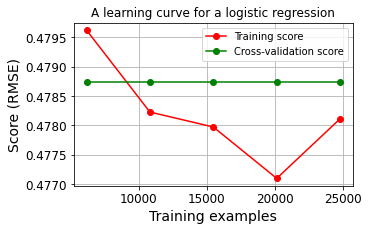

In [134]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 5)


train_sizes, train_mse, test_mse = learning_curve(logreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a logistic regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

In [135]:
# Decision Tree using Entropy

In [136]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=10, random_state=None, shuffle=True)

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=10, random_state=None, shuffle=True)


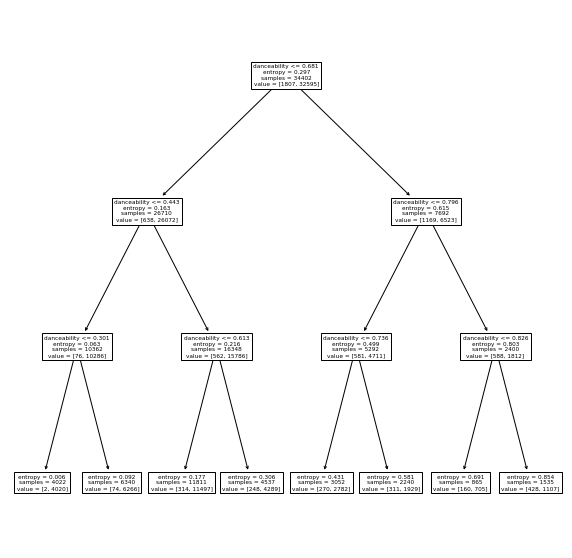

In [137]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')

clf.fit(X,y)

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf,ax=ax,feature_names=['danceability'])
plt.show()

In [139]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    target_names = ['Class 0', 'Class 1']

    result_metrics = classification_report(y_test, y_pred, target_names=target_names)

    print(result_metrics)

C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       192
     Class 1       0.94      1.00      0.97      3249

    accuracy                           0.94      3441
   macro avg       0.47      0.50      0.49      3441
weighted avg       0.89      0.94      0.92      3441

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       174
     Class 1       0.95      1.00      0.97      3267

    accuracy                           0.95      3441
   macro avg       0.47      0.50      0.49      3441
weighted avg       0.90      0.95      0.92      3441

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       190
     Class 1       0.94      1.00      0.97      3250

    accuracy                           0.94      3440
   macro avg       0.47      0.50      0.49      3440
weighted avg       0.89      0.94      0.92      3440

              preci

C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       185
     Class 1       0.95      1.00      0.97      3255

    accuracy                           0.95      3440
   macro avg       0.47      0.50      0.49      3440
weighted avg       0.90      0.95      0.92      3440

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       197
     Class 1       0.94      1.00      0.97      3243

    accuracy                           0.94      3440
   macro avg       0.47      0.50      0.49      3440
weighted avg       0.89      0.94      0.91      3440

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       178
     Class 1       0.95      1.00      0.97      3262

    accuracy                           0.95      3440
   macro avg       0.47      0.50      0.49      3440
weighted avg       0.90      0.95      0.92      3440

              preci

C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318